# Logistic Regression Tutorial

<ul>
    <li>Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.</li>
    <li>Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.</li>
</ul> 

# Steps of Logistic Regression

<ul>
    <li>Data Pre-processing step</li>
    <li>Fitting Logistic Regression to the Training set</li>
    <li>Predicting the test result</li>
    <li>Test accuracy of the result(Creation of Confusion matrix)</li>
    <li>Visualizing the test set result</li>
</ul>

### Step 1 -  Data Pre-processing Step

In [1]:
# Importing Libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
# Importing Datasets  
data= pd.read_csv('user_data.csv')

print(data.shape)
data.head(5)

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
# Extracting Independent and dependent Variable
X = data.iloc[:, [2,3]].values
y = data.iloc[:, 4].values

In [3]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

<p>In logistic regression, we will do feature scaling because we want accurate result of predictions. Here we will only scale the independent variable because dependent variable have only 0 and 1 values. Below is the code for it:</p>

In [4]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)

### Step 2 - Fitting Logistic Regression to the Training Set

In [5]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)  

LogisticRegression(random_state=0)

### Step 3 - Predicting The Test Result

In [6]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)

### Step 4 - Test Accuracy of The Result (Creation of Confusion matrix)

In [7]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
scores = classifier.score(X_test, y_test)

pred = classifier.predict(X_test)
accuracy_score(y_test, pred)

0.8375

### Step 5 - Visualizing The Test Set Result 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


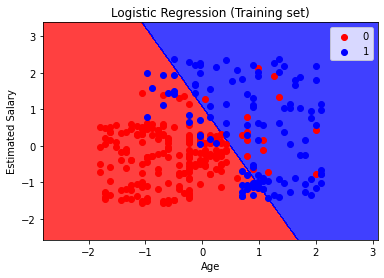

In [8]:
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = X_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','blue' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red','blue'))(i), label = j)
    c=np.array([color])
mtp.title('Logistic Regression (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  